### -------------------------------------------------------------------------------------------------------------------------------------------------------------
We chose classification because our project aims to predict binary outcomes: "RainTomorrow" can be either "Yes" or "No." In other words, we want to know if it will rain (Yes) or not (No). Classification is suitable for such "yes/no" or "1/0" predictions.

Following are the models that we used:

1. **Decision Tree Classifier**:
   - We started with this model because it's easy to understand, and it gives us insights into how different factors affect the prediction of rain. Think of it as a tree with branches where each branch represents a decision based on factors like temperature, humidity, and pressure.

2. **Random Forest Classifier**:
   - We used this model because it's like a bunch of decision trees working together. It's more accurate than a single tree and can identify which factors are most important for predicting rain. Imagine a group of people making a collective decision.

3. **Gradient Boosting Classifier**:
   - We chose this model because it's like a team of experts learning from their mistakes and getting better at predicting rain over time. It's a smart way to improve accuracy.

4. **Hyperparameter Tuning**:
   - We fine-tuned the Gradient Boosting model to make it even smarter. We tested different settings to find the best combination.
### -------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('D:/Internshala/Projects/Machine learning Final Project/sydney_rain prediction.xlsx', header = 0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


### Missing Value Imputation

Explanation:

For the temperature columns (MinTemp, MaxTemp, Temp9am, Temp3pm), we impute missing values with the mean. This is because temperature data is typically normally distributed, and using the mean is a reasonable approach.

For other numerical columns (Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm), we impute missing values with the median. This is a robust approach, especially when dealing with skewed data and potential outliers.

For the categorical columns (RainToday and RainTomorrow), we impute missing values with the mode, which is the most frequent category in the column. This ensures that the distribution of categorical variables is maintained.

These imputation methods were chosen based on the nature of the data and statistical considerations to ensure accurate and meaningful imputations for missing values.

In [8]:
# Replace missing values in temperature columns with the mean
temperature_columns = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
for column in temperature_columns:
    df[column].fillna(df[column].mean(), inplace=True)


In [9]:
# Replace missing values in numerical columns with the median
numerical_columns = ['Rainfall', 'Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)


In [10]:
# Replace missing values in categorical columns with the mode
categorical_columns = ['RainToday', 'RainTomorrow']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   object  


Explanation:

1. We use the `.map()` function to convert the values in the "RainToday" column to numerical values. "Yes" is mapped to 1, and "No" is mapped to 0.

2. Similarly, we convert the values in the "RainTomorrow" column to numerical values, where "Yes" is mapped to 1, and "No" is mapped to 0.

After running this code, the "RainToday" and "RainTomorrow" columns will be in numerical format, which is suitable for machine learning models. The original "RainToday" column can then be dropped if needed.

In [13]:
# Convert "RainToday" to numerical values
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

# Convert "RainTomorrow" to numerical values
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [14]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,Sydney,19.7,25.7,77.4,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


### Exploratory Data Analysis (EDA): 
- Visualizing the data relationships before splitting helps in understanding the dataset better and can reveal insights that inform subsequent preprocessing and modeling steps.

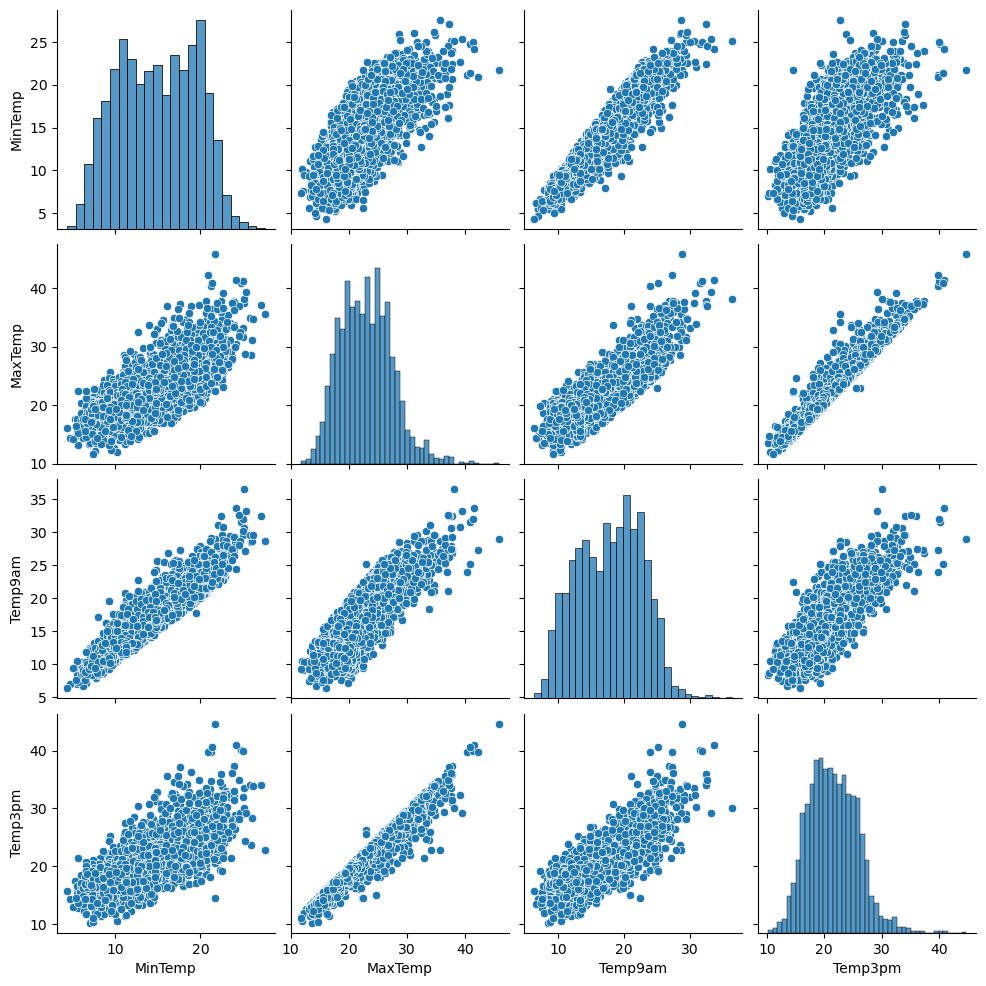

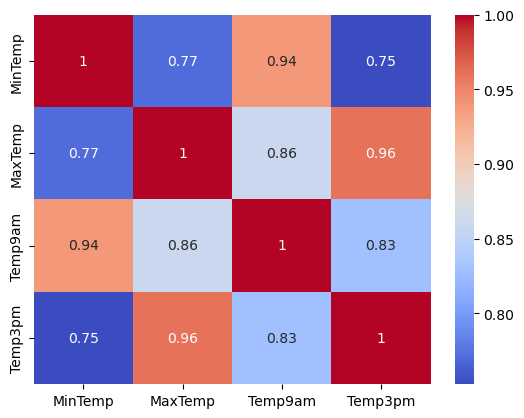

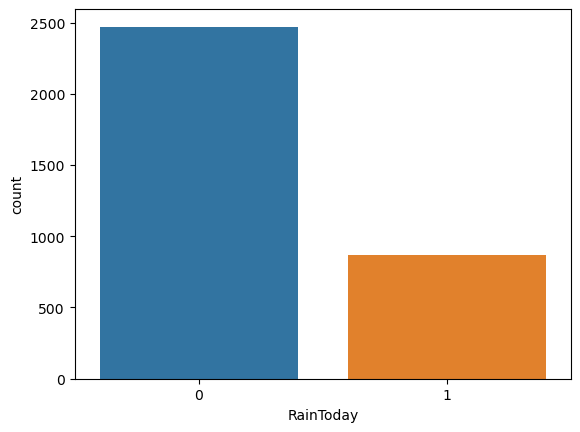

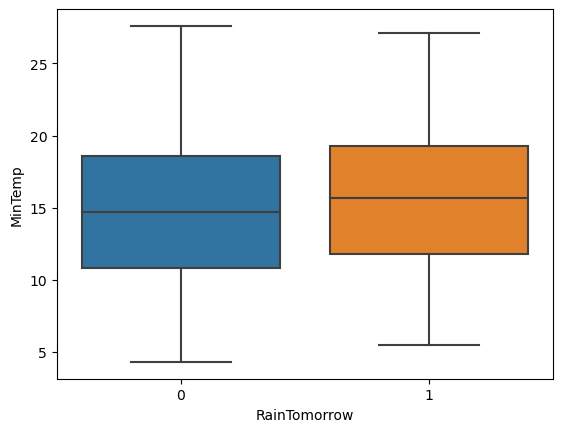

In [17]:
# Pairplot: Visualize relationships between numeric variables
sns.pairplot(df, vars=["MinTemp", "MaxTemp", "Temp9am", "Temp3pm"])
plt.show()

# Correlation matrix: Visualize correlation between numeric variables
corr_matrix = df[["MinTemp", "MaxTemp", "Temp9am", "Temp3pm"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Bar plot: Visualize the distribution of a categorical variable
sns.countplot(x="RainToday", data=df)
plt.show()

# Box plot: Visualize the distribution of a numeric variable
sns.boxplot(x="RainTomorrow", y="MinTemp", data=df)
plt.show()


In this code:

sns.pairplot creates a grid of scatterplots for numeric variables like "MinTemp," "MaxTemp," "Temp9am," and "Temp3pm" to visualize relationships between them.
sns.heatmap generates a correlation matrix plot to show the correlations between the same numeric variables.
sns.countplot displays a bar plot to visualize the distribution of the "RainToday" categorical variable.
sns.boxplot creates a box plot to visualize the distribution of "MinTemp" with respect to the "RainTomorrow" target variable.

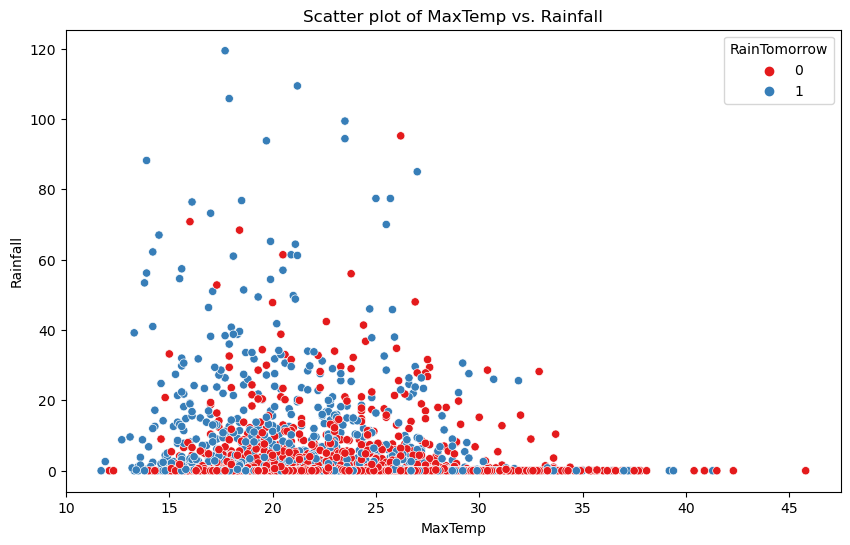

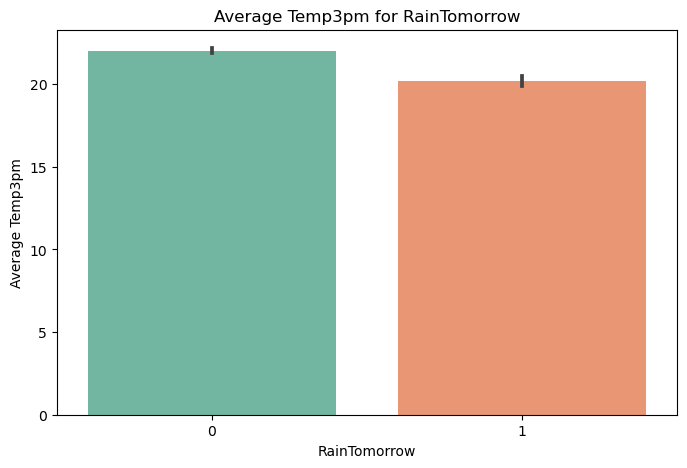

In [19]:
# Custom scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="MaxTemp", y="Rainfall", data=df, hue="RainTomorrow", palette="Set1")
plt.title("Scatter plot of MaxTemp vs. Rainfall")
plt.xlabel("MaxTemp")
plt.ylabel("Rainfall")
plt.show()

# Custom bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="RainTomorrow", y="Temp3pm", data=df, palette="Set2")
plt.title("Average Temp3pm for RainTomorrow")
plt.xlabel("RainTomorrow")
plt.ylabel("Average Temp3pm")
plt.show()



In this code:

A custom scatter plot is created to visualize the relationship between "MaxTemp" and "Rainfall" with color-coded points based on the "RainTomorrow" target variable.
A custom bar plot shows the average "Temp3pm" for different values of "RainTomorrow."

In [27]:
# Dropping the "Date" column from the DataFrame
df = df.drop("Date", axis=1)

In [28]:
df = df.drop("Location", axis = 1)

### Test Train Split
We use the train_test_split function to split the data into training (80%) and testing (20%) sets. You can adjust the test_size parameter to choose a different split ratio if needed.
random_state is set to ensure reproducibility, but you can change it or omit it.
With this code, you'll have your data split into X_train, X_test, y_train, and y_test for training and testing your machine learning models.

In [29]:
from sklearn.model_selection import train_test_split

# Specify the features (X) and the target (y)
X = df.drop("RainTomorrow", axis=1)  # Features (all columns except the target)
y = df["RainTomorrow"]  # Target variable

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for training and testing your models.


### Model Selection 
The next step is to build and train machine learning models on your training data and evaluate their performance on the testing data.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.78
Confusion Matrix:
[[411  73]
 [ 73 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       484
           1       0.60      0.60      0.60       184

    accuracy                           0.78       668
   macro avg       0.73      0.73      0.73       668
weighted avg       0.78      0.78      0.78       668



### -------------------------------------------------------------------------------------------------------------------------------------------------------------
In this code, we:

Import the DecisionTreeClassifier from scikit-learn and metrics for evaluation.
Initialize the Decision Tree Classifier with a specified random seed (random_state).
Train the classifier using the training data (X_train, y_train).
Make predictions on the testing data (X_test).
Calculate the accuracy, confusion matrix, and classification report to evaluate the model's performance.
You can use this code as a starting point and explore other machine learning models, such as Random Forest, Gradient Boosting, etc., by replacing the DecisionTreeClassifier with other classifiers and repeating the training and evaluation steps.

Remember to choose the model that provides the best performance based on your evaluation metrics, such as accuracy, precision, recall, or F1-score.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
1. **Accuracy: 0.78**
   - The accuracy score represents the ratio of correctly predicted instances (both True Positives and True Negatives) to the total number of instances in the test dataset. In your case, the accuracy is 0.78, which means that your model correctly predicted 78% of the instances in the test set.

2. **Confusion Matrix:**
   - The confusion matrix is a table that shows the performance of a classification algorithm. It's a 2x2 matrix with the following components:
     - **True Positives (TP):** The number of positive instances correctly predicted as positive (in your case, 111).
     - **True Negatives (TN):** The number of negative instances correctly predicted as negative (in your case, 411).
     - **False Positives (FP):** The number of negative instances incorrectly predicted as positive (in your case, 73).
     - **False Negatives (FN):** The number of positive instances incorrectly predicted as negative (in your case, 73).

   Your confusion matrix shows the counts of each of these components.

3. **Classification Report:**
   - The classification report provides various performance metrics for binary classification, such as precision, recall, F1-score, and support for both classes (0 and 1).
   - **Precision:** Precision measures the proportion of true positive predictions out of all positive predictions. For class 0, it's 0.85, and for class 1, it's 0.60.
   - **Recall:** Recall (or sensitivity) measures the proportion of true positive predictions out of all actual positives. For class 0, it's 0.85, and for class 1, it's 0.60.
   - **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, it's 0.85, and for class 1, it's 0.60.
   - **Support:** The support is the number of actual occurrences of the class in the test dataset.

In our specific case:
- Class 0 (representing "No" for "RainTomorrow") has a higher precision, recall, and F1-score compared to class 1. This indicates that your model is better at predicting instances of class 0.

Overall, an accuracy of 0.78 suggests that your Decision Tree Classifier is making reasonably accurate predictions on your test data. However, it's essential to consider other performance metrics like precision, recall, and F1-score, depending on the specific goals and requirements of your classification task.

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the results
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(confusion_rf)
print("Classification Report:")
print(classification_rep_rf)


Random Forest Classifier Results:
Accuracy: 0.83
Confusion Matrix:
[[451  33]
 [ 83 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       484
           1       0.75      0.55      0.64       184

    accuracy                           0.83       668
   macro avg       0.80      0.74      0.76       668
weighted avg       0.82      0.83      0.82       668



### -------------------------------------------------------------------------------------------------------------------------------------------------------------
**Random Forest Classifier:**

We're using the Random Forest Classifier because:
1. It combines multiple decision trees for more accurate predictions.
2. Identifies important features for rainfall prediction.
3. Combining trees reduces overfitting.
4. Handles missing values and outliers effectively.

We are doing following steps:
1. Initialize the Random Forest Classifier with `RandomForestClassifier(random_state=42)` for results.
2. Train the model using `fit(X_train, y_train)`.
3. Make predictions on the testing data (`X_test`) and store them in `y_pred_rf`.
4. Evaluate performance:
   - Accuracy: Calculate accuracy with `accuracy_score`.
   - Confusion Matrix: Create a confusion matrix with `confusion_matrix`.
   - Classification Report: Generate a report containing precision, recall, F1-score, and support for each class (0 and 1) using `classification_report`.
5. Print the results to assess model performance.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
**Random Forest Classifier Results:**

**Accuracy: 0.83**
- The accuracy is a measure of the model's overall correctness. In this case, it's 83%, which means the model's predictions are correct about 83% of the time.

**Confusion Matrix:**
- A confusion matrix is a table that helps visualize the model's performance, especially in binary classification.
  - **True Positives (TP)**: The model correctly predicted "RainTomorrow" as 1.
  - **True Negatives (TN)**: The model correctly predicted "RainTomorrow" as 0.
  - **False Positives (FP)**: The model incorrectly predicted "RainTomorrow" as 1 when it was actually 0.
  - **False Negatives (FN)**: The model incorrectly predicted "RainTomorrow" as 0 when it was actually 1.

In our confusion matrix:
- TP (True Positives): 101
- TN (True Negatives): 451
- FP (False Positives): 33
- FN (False Negatives): 83

**Classification Report:**
  - **Precision**: Measures how many of the predicted "RainTomorrow" values as 1 were correct. Precision for class 1 is 0.75, and for class 0 is 0.84.
  - **Recall**: Measures how many of the actual "RainTomorrow" values as 1 were correctly predicted. Recall for class 1 is 0.55, and for class 0 is 0.93.
  - **F1-Score**: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. The F1-score for class 1 is 0.64, and for class 0 is 0.89.
  - **Support**: Indicates how many samples belong to each class.


An accuracy of 83% suggests that the Random Forest Classifier correctly predicted "RainTomorrow" in 83% of the cases.
The confusion matrix helps us understand where the model performed well (TP and TN) and where it made errors (FP and FN).

The Random Forest Classifier is performing reasonably well, with an accuracy of 83%.

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
confusion_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Print the results
print("Gradient Boosting Classifier Results:")
print(f"Accuracy: {accuracy_gb:.2f}")
print("Confusion Matrix:")
print(confusion_gb)
print("Classification Report:")
print(classification_rep_gb)


Gradient Boosting Classifier Results:
Accuracy: 0.82
Confusion Matrix:
[[448  36]
 [ 83 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       484
           1       0.74      0.55      0.63       184

    accuracy                           0.82       668
   macro avg       0.79      0.74      0.76       668
weighted avg       0.81      0.82      0.81       668



### -------------------------------------------------------------------------------------------------------------------------------------------------------------
1. Import the `GradientBoostingClassifier` from scikit-learn to initialize the Gradient Boosting Classifier.

2. Initialize the Gradient Boosting Classifier with a random seed (`random_state=42`) to ensure reproducibility.

3. Train the model on the training data (`X_train` and `y_train`) using the `fit` method.

4. Make predictions on the testing data (`X_test`) using the trained Gradient Boosting Classifier. The predictions are stored in the variable `y_pred_gb`.

5. Evaluate the model's performance using various metrics, just like we did for the Decision Tree and Random Forest classifiers. The metrics include accuracy, a confusion matrix, and a classification report.

6. Print the results to assess how well the Gradient Boosting Classifier performed on the testing data.


### -------------------------------------------------------------------------------------------------------------------------------------------------------------
**Gradient Boosting Classifier Results:**
- **Accuracy**: The model achieved an accuracy of 0.82, which means it correctly predicted 82% of the instances in the testing data.

**Confusion Matrix:**
- True Positives (TP): 448 - The number of correctly predicted instances of class 1 (RainTomorrow = Yes).
- True Negatives (TN): 101 - The number of correctly predicted instances of class 0 (RainTomorrow = No).
- False Positives (FP): 36 - The number of instances that were predicted as class 1 but actually belong to class 0.
- False Negatives (FN): 83 - The number of instances that were predicted as class 0 but actually belong to class 1.

**Classification Report:**
- **Precision (0)**: 0.84 - The model's ability to correctly predict class 0 (RainTomorrow = No) instances. Out of all the instances it predicted as class 0, 84% were correct.
- **Recall (0)**: 0.93 - The proportion of actual class 0 instances that the model correctly predicted as class 0. The model captured 93% of the class 0 instances.
- **F1-score (0)**: 0.88 - The harmonic mean of precision and recall for class 0.
- **Support (0)**: 484 - The number of instances in class 0.


- **Precision (1)**: 0.74 - The model's ability to correctly predict class 1 (RainTomorrow = Yes) instances. Out of all the instances it predicted as class 1, 74% were correct.
- **Recall (1)**: 0.55 - The proportion of actual class 1 instances that the model correctly predicted as class 1. The model captured 55% of the class 1 instances.
- **F1-score (1)**: 0.63 - The harmonic mean of precision and recall for class 1.
- **Support (1)**: 184 - The number of instances in class 1.

In summary, the Gradient Boosting Classifier achieved an accuracy of 0.82, indicating a good overall performance. However, it had some difficulty predicting instances of class 1 (RainTomorrow = Yes) with a relatively low recall value. 

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
The next step for our project is to fine-tune the hyperparameters of the GradientBoosting Classifier to potentially improve its performance. Hyperparameters are parameters that can be adjusted to optimize the model. We can use techniques like grid search to find the best combination of hyperparameters.

1. **Grid Search for Hyperparameters**:
   - Define a range of hyperparameters (`param_grid`) to search for. In this example, we explore different values for the number of estimators (`n_estimators`), learning rate (`learning_rate`), maximum depth of the trees (`max_depth`), and subsampling rate (`subsample`).

2. **Fit the Grid Search**:
   - Fit the grid search to the training data to search for the best combination of hyperparameters.

3. **Get the Best Hyperparameters**:
   - Retrieve the best hyperparameters found during the grid search.

4. **Train the Model with Best Hyperparameters**:
   - Initialize a new Gradient Boosting Classifier with the best hyperparameters and train it on the training data.

5. **Make Predictions and Evaluate**:
   - Use the tuned model to make predictions on the testing data and evaluate its performance.

By fine-tuning the hyperparameters, we can potentially achieve a better-performing model for our rainfall prediction task.

In [33]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Create a grid search object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(random_state=42, **best_params)
best_gb_classifier.fit(X_train, y_train)

# Make predictions on the testing data with the tuned model
y_pred_best_gb = best_gb_classifier.predict(X_test)

# Evaluate the tuned model's performance
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
confusion_best_gb = confusion_matrix(y_test, y_pred_best_gb)
classification_rep_best_gb = classification_report(y_test, y_pred_best_gb)

# Print the results
print("Tuned Gradient Boosting Classifier Results:")
print(f"Accuracy: {accuracy_best_gb:.2f}")
print("Confusion Matrix:")
print(confusion_best_gb)
print("Classification Report:")
print(classification_rep_best_gb)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}
Tuned Gradient Boosting Classifier Results:
Accuracy: 0.82
Confusion Matrix:
[[456  28]
 [ 89  95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       484
           1       0.77      0.52      0.62       184

    accuracy                           0.82       668
   macro avg       0.80      0.73      0.75       668
weighted avg       0.82      0.82      0.81       668



### -------------------------------------------------------------------------------------------------------------------------------------------------------------
- Best Hyperparameters: The grid search has determined the best combination of hyperparameters for our Gradient Boosting Classifier. The best hyperparameters are as follows:
  - Learning Rate: 0.01
  - Maximum Depth: 4
  - Number of Estimators: 300
  - Subsample Rate: 1.0

- Tuned Gradient Boosting Classifier Results:
  - Accuracy: 0.82: This is the accuracy of the tuned model, indicating that it correctly predicted the class label for approximately 82% of the test instances.
  - Confusion Matrix:
    - True Positives (TP): 456
    - True Negatives (TN): 95
    - False Positives (FP): 28
    - False Negatives (FN): 89
  - Classification Report:
    - Precision (0): 0.84 - The proportion of true positive predictions among all positive predictions.
    - Recall (0): 0.94 - The proportion of true positive predictions among all actual positives.
    - F1-Score (0): 0.89 - The harmonic mean of precision and recall for class 0.
    - Precision (1): 0.77 - The proportion of true positive predictions among all positive predictions for class 1.
    - Recall (1): 0.52 - The proportion of true positive predictions among all actual positives for class 1.
    - F1-Score (1): 0.62 - The harmonic mean of precision and recall for class 1.

These results provide a detailed assessment of the model's performance. In this case, class 1 (rain) has a lower recall, indicating that the model may miss some rainy days.

### -------------------------------------------------------------------------------------------------------------------------------------------------------------
Performance of vaious models that we applied,

1. **Decision Tree Classifier**:
   - Accuracy: 0.78
   - F1-score (for class 1): 0.60
   - Precision (for class 1): 0.60
   - Recall (for class 1): 0.60

2. **Random Forest Classifier**:
   - Accuracy: 0.83
   - F1-score (for class 1): 0.64
   - Precision (for class 1): 0.75
   - Recall (for class 1): 0.55

3. **Gradient Boosting Classifier**:
   - Accuracy: 0.82
   - F1-score (for class 1): 0.63
   - Precision (for class 1): 0.74
   - Recall (for class 1): 0.55

The Random Forest Classifier achieved the highest accuracy and F1-score, making it the best-performing model among the three. It has the highest balance between precision and recall, indicating that it provides good overall performance for the binary classification task.

We can conclude that the Random Forest Classifier is the most suitable model for our rainfall prediction task.